# Problem Statement

To build a machine learning system that can detect whether a credit card transaction is legit or fraud.

# Work Flow

1. Data Collection ->  involves dataset consisting of various features for analyzing the fraud detection
2. Data Preprocessing -> here we are having a very unbalaned dataset we need to make it balanced 
3. Data Analysis -> to analyze the various features present in the dataset and to draw the relationships between them
4. Data Splitting -> training data & test data
5. Model Building -> Selecting the suitable model based on our insights (Logistic Regression - since it involves binary classification)
6. Model Evaluation -> Using the test data

In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Data Collection

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


- Time -> time elapsed in seconds from the 1st transaction has happened 
- v1 to v28 -> features converted as principal components
- Amount -> amount drawn in USD
- Class -> 0 => legit transaction, 1 => fraud transaction

In [3]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
172792/3600   # here, we are provided with 2 days of transaction data

47.99777777777778

# Data Preprocessing

In [5]:
data.shape

(284807, 31)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
# checking for missing values in the dataset
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
# finding out the number of legit and fraud transactions
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Here, we notice that out data is highly unbalanced, since most of the values belongs to class 0

In [9]:
# separating the two classes
legit = data[data.Class == 0]
fraud = data[data.Class == 1]

In [10]:
print(legit.shape, fraud.shape)

(284315, 31) (492, 31)


# Data Analysis

In [11]:
# Statistical measures of legit data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
# Statistical measures of legit data
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
# comapring the mean value for both transactions on all columns
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [14]:
# to make the dataset balanced we need to have equal number of legit & fraud transactions
# hence, we take only 492 values (since fraud having only 492) out of 284315 values of legit transactions

legit_sample = legit.sample(n=492)    # random sampling

In [15]:
# appending both legit_sample & fraud data

new_data = legit_sample.append(fraud)
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
140354,83676.0,0.985990,-0.432724,0.014782,0.772430,-0.289707,-0.178401,0.183194,-0.135061,0.476342,...,-0.189357,-0.707608,-0.232301,-0.410258,0.513621,0.303925,-0.052042,0.032215,164.72,0
216393,140457.0,-0.330358,0.972541,-0.244774,-0.749753,0.282359,-0.545918,0.504652,0.459826,-0.332051,...,-0.191033,-0.583576,0.099554,-0.496207,-0.479640,0.155517,0.112570,0.019306,12.28,0
147779,88979.0,-0.633681,0.175037,1.611566,-0.886502,0.028561,-0.548003,0.279071,0.097263,0.526111,...,0.245883,0.678598,-0.177349,-0.082248,-0.224235,0.467302,0.078714,0.146407,28.75,0
201121,133738.0,2.105473,-0.062753,-1.636687,-0.075669,0.795978,0.174353,0.074220,-0.083310,0.181446,...,-0.301708,-0.755022,0.217152,-0.322409,-0.129882,0.207484,-0.074064,-0.071625,2.28,0
248030,153775.0,-0.725057,0.550681,-0.399291,0.623996,0.775684,-0.628566,2.108736,-0.268218,-0.764099,...,0.108011,-0.093799,0.511042,0.919696,-0.199282,-0.884730,0.110423,0.249099,242.09,0


In [16]:
new_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [17]:
print(legit_sample.shape, fraud.shape)

(492, 31) (492, 31)


In [18]:
# comapring the mean value for both transactions on all columns after sampling
new_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94880.770325,0.079085,0.060185,0.014624,0.133461,0.021987,-0.042641,0.072456,0.079143,0.064152,...,0.028369,-0.022709,0.030270,0.007369,0.016131,-0.017493,0.012607,0.016636,0.002347,87.787276
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Here, we see not very much change in the mean values of legit data after sampling. Therefore we got a good sample. Hence we can proceed further.

# Data Splitting

In [19]:
x = new_data.iloc[:,:-1]
y = new_data.Class

In [20]:
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
140354   83676.0  0.985990 -0.432724  0.014782  0.772430 -0.289707 -0.178401   
216393  140457.0 -0.330358  0.972541 -0.244774 -0.749753  0.282359 -0.545918   
147779   88979.0 -0.633681  0.175037  1.611566 -0.886502  0.028561 -0.548003   
201121  133738.0  2.105473 -0.062753 -1.636687 -0.075669  0.795978  0.174353   
248030  153775.0 -0.725057  0.550681 -0.399291  0.623996  0.775684 -0.628566   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [21]:
print(y)

140354    0
216393    0
147779    0
201121    0
248030    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [22]:
# Splitting into training data & test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2, stratify=y)

In [23]:
print(x.shape, x_train.shape, x_test.shape)

(984, 30) (787, 30) (197, 30)


# Logistic Regression

**Model Building**

In [24]:
# loading the logistic regression model
model  = LogisticRegression().fit(x_train, y_train)

C:\Users\K.KALYANKUMAR\Downloads\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
# accuracy of training data

x_train_pred = model.predict(x_train)
training_accuracy = accuracy_score(x_train_pred, y_train)
training_accuracy

0.9491740787801779

**Model Evaluation**

Evaluation Metrics

- Accuracy Score – no. of correctly classified instances/total no. of instances
- Precision Score – the ratio of correctly predicted instances over total positive instances
- Recall Score – the ratio of correctly predicted instances over total instances in that class
- Roc Curve – a plot of true positive rate against false positive rate
- Confusion Matrix – a table used to describe the classification models

In [26]:
# accuracy of test data

x_test_pred = model.predict(x_test)
test_accuracy = accuracy_score(x_test_pred, y_test)
test_accuracy

0.934010152284264

In [27]:
# confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, x_test_pred)

array([[97,  2],
       [11, 87]], dtype=int64)

In [28]:
# import accuracy_score, precision_score, recall_score, f1_score from scikit-learn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Computing the accuracy, precision, recall and F1 scores of the model using your test data 'y_test' 
print('Accuracy score: ', format(accuracy_score(y_test, x_test_pred)))
print('Precision score: ', format(precision_score(y_test, x_test_pred)))
print('Recall score: ', format(recall_score(y_test, x_test_pred)))
print('F1 score: ', format(f1_score(y_test, x_test_pred)))

Accuracy score:  0.934010152284264
Precision score:  0.9775280898876404
Recall score:  0.8877551020408163
F1 score:  0.9304812834224598


**ROC Curve**

In [29]:
# probability of the class using the predict_proba()
predictions_probability = model.predict_proba(x_test)

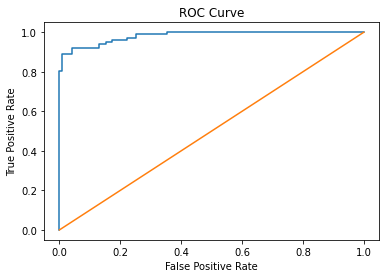

In [30]:
# ROC Curve
from sklearn.metrics import roc_curve

fpr,tpr,thresholds = roc_curve(y_test, predictions_probability[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

As we can see that our Logistic Regression model performed very well in classifying the Credit Card Transactions, with an Accuracy score, Precision and Recall of approx **93%**. And the roc curve and confusion matrix are great as well which means that our model is able to classify the labels accurately, with fewer chances of error.

# Making a predective System

In [31]:
# input data -> (11, 1.069373588, 0.287722129, 0.828612727, 2.71252043, -0.178398016, 0.33754373, -0.096716862, 
# 0.115981736, -0.221082566, 0.460230444, -0.773656931, 0.323387245, -0.011075887, -0.178485175, -0.655564278, 
# -0.199925171, 0.124005415, -0.980496202, -0.982916082, -0.153197231, -0.036875532, 0.074412403, -0.071407433, 
# 0.104743753, 0.548264725, 0.104094153, 0.021491058, 0.021293311, 27.5)    
# output ->   legit=0)
 

input_data = (11, 1.069373588, 0.287722129, 0.828612727, 2.71252043, -0.178398016, 0.33754373, -0.096716862, 
0.115981736, -0.221082566, 0.460230444, -0.773656931, 0.323387245, -0.011075887, -0.178485175, -0.655564278, 
-0.199925171, 0.124005415, -0.980496202, -0.982916082, -0.153197231, -0.036875532, 0.074412403, -0.071407433, 
0.104743753, 0.548264725, 0.104094153, 0.021491058, 0.021293311, 27.5)

# changing input_data to numpy array
input_data_array = np.asarray(input_data)

# reshaping the array
input_data_reshape = input_data_array.reshape(1, -1)

In [32]:
prediction = model.predict(input_data_reshape)
print(prediction)

[1]


In [33]:
# input data -> (20451, -15.81917872, 8.775997153, -22.80468646, 11.86486808, -9.092360532, -2.386893207, -16.56036811, 
# 0.948348595, -6.31065843, -13.08889092, 9.815703174, -14.05606118, 0.777191846, -13.76101796, -0.35363594, -7.957447226,
# -11.96295423, -4.780507788, 0.652498045, 0.992278949, -2.350633745, 1.036361874, 1.136050737, -1.043413741, -0.108923343,
# 0.657436778, 2.136424471, -1.411945375, 1)  
# Outpt ->    fraud=1)

input_data = (20451, -15.81917872, 8.775997153, -22.80468646, 11.86486808, -9.092360532, -2.386893207, -16.56036811, 
0.948348595, -6.31065843, -13.08889092, 9.815703174, -14.05606118, 0.777191846, -13.76101796, -0.35363594, -7.957447226,
-11.96295423, -4.780507788, 0.652498045, 0.992278949, -2.350633745, 1.036361874, 1.136050737, -1.043413741, -0.108923343,
0.657436778, 2.136424471, -1.411945375, 1)

# changing input_data to numpy array
input_data_array = np.asarray(input_data)

# reshaping the array
input_data_reshape = input_data_array.reshape(1, -1)

In [34]:
prediction = model.predict(input_data_reshape)
print(prediction)

[1]


# K Nearest Neighbours

**Model Building**

In [35]:
# importing the K neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

# Create the classifier
model_knn = KNeighborsClassifier(n_neighbors=5)

# fit the training data into the classifier
model_knn.fit(x_train, y_train)

pred_train_knn = model_knn.predict(x_train)
training_accuracy_knn = accuracy_score(pred_train_knn, y_train)
training_accuracy_knn

0.7547649301143583

In [36]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV 

parameters = [{'n_neighbors':[3,4,5,6,7,8,9,10,11,12,13,14,15]}]
search = GridSearchCV(model_knn, parameters, scoring='accuracy', cv=5, verbose=True).fit(x_train,y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.7s finished


In [37]:
# optimum parameter values
search.best_params_

{'n_neighbors': 7}

In [38]:
model_knn = KNeighborsClassifier(n_neighbors=13).fit(x_train, y_train)

In [39]:
# accuracy of training data

pred_train_knn = model_knn.predict(x_train)
training_accuracy_knn = accuracy_score(pred_train_knn, y_train)
training_accuracy_knn

0.6823379923761118

**Model Evaluation**

In [40]:
# accuracy of test data

pred_test_knn = model_knn.predict(x_test)
test_accuracy_knn = accuracy_score(pred_test_knn, y_test)
test_accuracy_knn

0.6345177664974619

In [41]:
# confusion matrix
confusion_matrix(y_test, pred_test_knn)

array([[72, 27],
       [45, 53]], dtype=int64)

In [42]:
# Computing the accuracy, precision, recall and F1 scores of the model using your test data 'y_test' 
print('Accuracy score: ', format(accuracy_score(y_test, pred_test_knn)))
print('Precision score: ', format(precision_score(y_test, pred_test_knn)))
print('Recall score: ', format(recall_score(y_test, pred_test_knn)))
print('F1 score: ', format(f1_score(y_test, pred_test_knn)))

Accuracy score:  0.6345177664974619
Precision score:  0.6625
Recall score:  0.5408163265306123
F1 score:  0.5955056179775281


**ROC Curve**

In [43]:
# probability of the class using the predict_proba()
predictions_probability = model_knn.predict_proba(x_test)

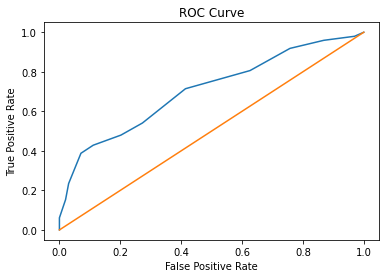

In [44]:
# ROC Curve
fpr,tpr,thresholds = roc_curve(y_test, predictions_probability[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

As we can see that our KNN Classifier model not performed well in classifying the Credit Card Transactions, with an Accuracy score, Precision and Recall of approx **63%**. And the roc curve and confusion matrix are not good as well which means that our model is not able to classify the labels accurately.

# Support Vector Machine

**Model Building**

In [45]:
# Loading Support Vector Machine Model
from sklearn import svm

model_svm = svm.SVC(kernel='linear').fit(x_train,y_train)

In [46]:
# accuracy of training data

x_train_svm = model_svm.predict(x_train)
training_accuracy_svm = accuracy_score(x_train_svm, y_train)
training_accuracy_svm

0.9059720457433291

**Model Evaluation**

In [47]:
# accuracy of test data

x_test_svm = model_svm.predict(x_test)
test_accuracy_svm = accuracy_score(x_test_svm, y_test)
test_accuracy_svm

0.9035532994923858

In [48]:
# confusion matrix
confusion_matrix(y_test, x_test_svm)

array([[98,  1],
       [18, 80]], dtype=int64)

In [49]:
# Computing the accuracy, precision, recall and F1 scores of the model using your test data 'y_test' 
print('Accuracy score: ', format(accuracy_score(y_test, x_test_svm)))
print('Precision score: ', format(precision_score(y_test, x_test_svm)))
print('Recall score: ', format(recall_score(y_test, x_test_svm)))
print('F1 score: ', format(f1_score(y_test, x_test_svm)))

Accuracy score:  0.9035532994923858
Precision score:  0.9876543209876543
Recall score:  0.8163265306122449
F1 score:  0.893854748603352


As we can see that our SVM Classifier model performed good in classifying the credit card transactions, with an Accuracy score, Precision and Recall of approx **90%**.

# Naive Bayes 

**Model Building**

In [50]:
# Loading Naive Bayes Model
from sklearn.naive_bayes import GaussianNB

model_naive = GaussianNB().fit(x_train,y_train)

In [51]:
# accuracy of training data

x_train_nb = model_naive.predict(x_train)
training_accuracy_nb = accuracy_score(x_train_nb, y_train)
training_accuracy_nb

0.8627700127064803

**Model Evaluation**

In [52]:
# accuracy of test data

x_test_nb = model_naive.predict(x_test)
test_accuracy_nb = accuracy_score(x_test_nb, y_test)
test_accuracy_nb

0.8578680203045685

In [53]:
# confusion matrix
confusion_matrix(y_test, x_test_nb)

array([[97,  2],
       [26, 72]], dtype=int64)

In [54]:
# Computing the accuracy, precision, recall and F1 scores of the model using your test data 'y_test' 
print('Accuracy score: ', format(accuracy_score(y_test, x_test_nb)))
print('Precision score: ', format(precision_score(y_test, x_test_nb)))
print('Recall score: ', format(recall_score(y_test, x_test_nb)))
print('F1 score: ', format(f1_score(y_test, x_test_nb)))

Accuracy score:  0.8578680203045685
Precision score:  0.972972972972973
Recall score:  0.7346938775510204
F1 score:  0.8372093023255813


**ROC Curve**

In [56]:
# probability of the class using the predict_proba()
predictions_probability = model_naive.predict_proba(x_test)

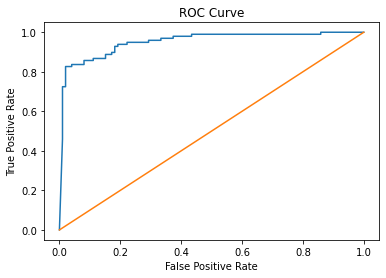

In [57]:
# ROC Curve
fpr,tpr,thresholds = roc_curve(y_test, predictions_probability[:,1])
plt.plot(fpr,tpr)
plt.plot([0,1])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

As we can see that our Naive Bayes model performed well in classifying the credit card transactions, with an Accuracy score, Precision and Recall of approx **86%**. And the roc curve and confusion matrix are good as well which means that Naive Bayes model is able to classify the labels accurately, with fewer chances of error.

# Comparison

Decreasing order of accuracy is depicted as:
- Logistic Regression - 0.9340
- Support Vector Machine - 0.9035
- Naive Bayes - 0.8578
- K-nearest Neighbors - 0.6345

The results are highly clear that except KNN all the models are good in detecting the fraud transactions. Logistic Regression is the most accurate method because its ability to handle binary data. Also, it performs well even with the presence of principal components of features and is relatively unaffected by them.